In [4]:
#import relevant visualisation libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from IPython.display import display, HTML

# Set style for better-looking plots
plt.style.use('seaborn')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8] 

In [10]:
# Read the CSV file
df = pd.read_csv('SIUUU.csv')

# Create a title with HTML styling
print("\033[1m" + "Cristiano Ronaldo Statistics Analysis" + "\033[0m")
print("=" * 50 + "\n")

# Display the top 5 rows with styled DataFrame
print("\033[1m" + "Top 5 Rows of Dataset:" + "\033[0m")
styled_df = (df.head()
    .style
    .background_gradient(cmap='Blues', subset=df.head().select_dtypes(include=[np.number]).columns)
    .set_properties(**{
        'border-color': 'black',
        'border-style': 'solid',
        'border-width': '1px',
        'padding': '10px'
    })
    .format(precision=2)  # Round numerical values to 2 decimal places
)
display(styled_df)


Cristiano Ronaldo Statistics Analysis

Top 5 Rows of Dataset:


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,nan
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,nan,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,nan,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,nan,13,3:00,nan,nan


In [6]:
# Dataset information with better formatting
print("\n\033[1m" + "Dataset Information:" + "\033[0m")
print("-" * 30)
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"Missing Values: {df.isnull().sum().sum()}")
print("\nColumn Types:")
for col, dtype in df.dtypes.items():
    print(f"- {col}: {dtype}")

# Basic statistics with better formatting
print("\n\033[1m" + "Numerical Statistics:" + "\033[0m")
print("-" * 30)
numeric_stats = (df.describe()
                  .round(2)
                  .style
                  .background_gradient(cmap='Greens')
                  .format(precision=2))
display(numeric_stats)


Dataset Information:
------------------------------
Total Rows: 710
Total Columns: 13
Missing Values: 319

Column Types:
- Season: object
- Competition: object
- Matchday: object
- Date: object
- Venue: object
- Club: object
- Opponent: object
- Result: object
- Playing_Position: object
- Minute: object
- At_score: object
- Type: object
- Goal_assist: object

Numerical Statistics:
------------------------------


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,710,710,710,710,710,710,710,710,652,710,710,695,464
unique,21,17,52,468,2,5,129,57,5,106,43,11,91
top,14/15,LaLiga,Group Stage,09-12-15,H,Real Madrid,Sevilla FC,3:00,LW,90,1:00,Right-footed shot,Karim Benzema
freq,61,311,75,5,404,450,27,49,356,17,111,253,44


In [7]:
# Add data quality check
print("\n\033[1m" + "Data Quality Check:" + "\033[0m")
print("-" * 30)
quality_report = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique Values': df.nunique(),
    'Data Type': df.dtypes
})
display(quality_report.style.background_gradient(cmap='Oranges', subset=['Missing %']))


Data Quality Check:
------------------------------


,Missing Values,Missing %,Unique Values,Data Type
Season,0,0.000000,21,object
Competition,0,0.000000,17,object
Matchday,0,0.000000,52,object
Date,0,0.000000,468,object
Venue,0,0.000000,2,object
Club,0,0.000000,5,object
Opponent,0,0.000000,129,object
Result,0,0.000000,57,object
Playing_Position,58,8.170000,5,object
Minute,0,0.000000,106,object


In [14]:
from datetime import datetime

# Read the CSV and convert dates
def convert_date(date_str):
    try:
        # Try first format (MM-DD-YY)
        return pd.to_datetime(date_str, format='%m-%d-%y')
    except:
        try:
            # Try second format (MM/DD/YY)
            return pd.to_datetime(date_str, format='%m/%d/%y')
        except:
            return pd.NaT

# Create dataframe and convert dates
df['date'] = df['Date'].apply(convert_date)

# Create monthly goals aggregation
monthly_goals = df.groupby(df['date'].dt.to_period('M')).size().reset_index()
monthly_goals.columns = ['date', 'goals']
monthly_goals['date'] = monthly_goals['date'].dt.to_timestamp()


Scoring Statistics:
Total Goals: 710
Average Goals per Month: 4.15
Most Goals in a Month: 11 (October 2010)


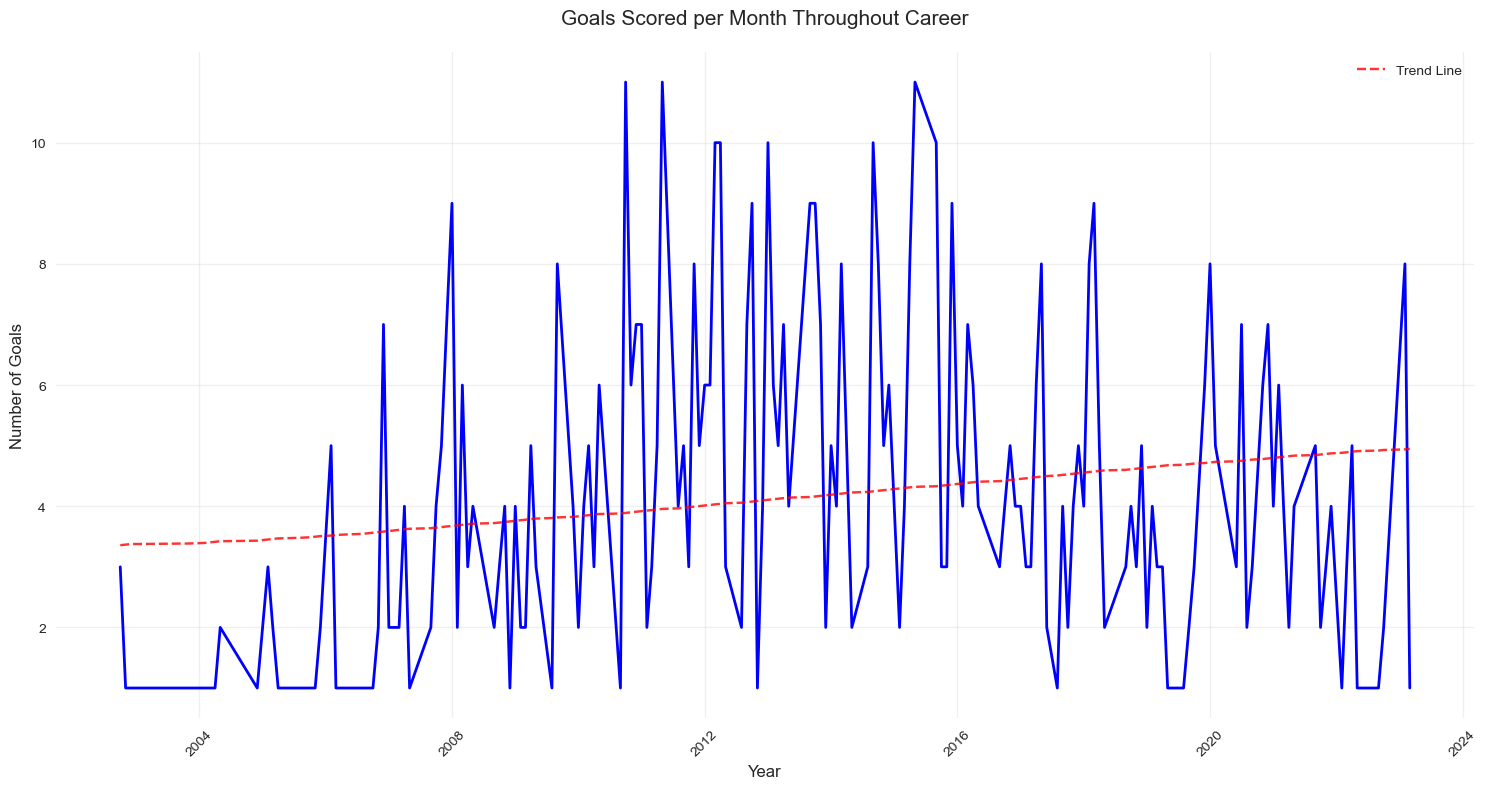

In [15]:
# Create visualization
plt.figure(figsize=(15, 8))
plt.plot(monthly_goals['date'], monthly_goals['goals'], linewidth=2, color='blue')

# Customize the plot
plt.title('Goals Scored per Month Throughout Career', fontsize=15, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Goals', fontsize=12)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add some statistics
print("\nScoring Statistics:")
print(f"Total Goals: {len(df)}")
print(f"Average Goals per Month: {monthly_goals['goals'].mean():.2f}")
print(f"Most Goals in a Month: {monthly_goals['goals'].max()} ({monthly_goals.loc[monthly_goals['goals'].idxmax(), 'date'].strftime('%B %Y')})")

# Create trend line
z = np.polyfit(range(len(monthly_goals)), monthly_goals['goals'], 1)
p = np.poly1d(z)
plt.plot(monthly_goals['date'], p(range(len(monthly_goals))), "r--", alpha=0.8, label='Trend Line')

plt.legend()
plt.tight_layout()
plt.show()

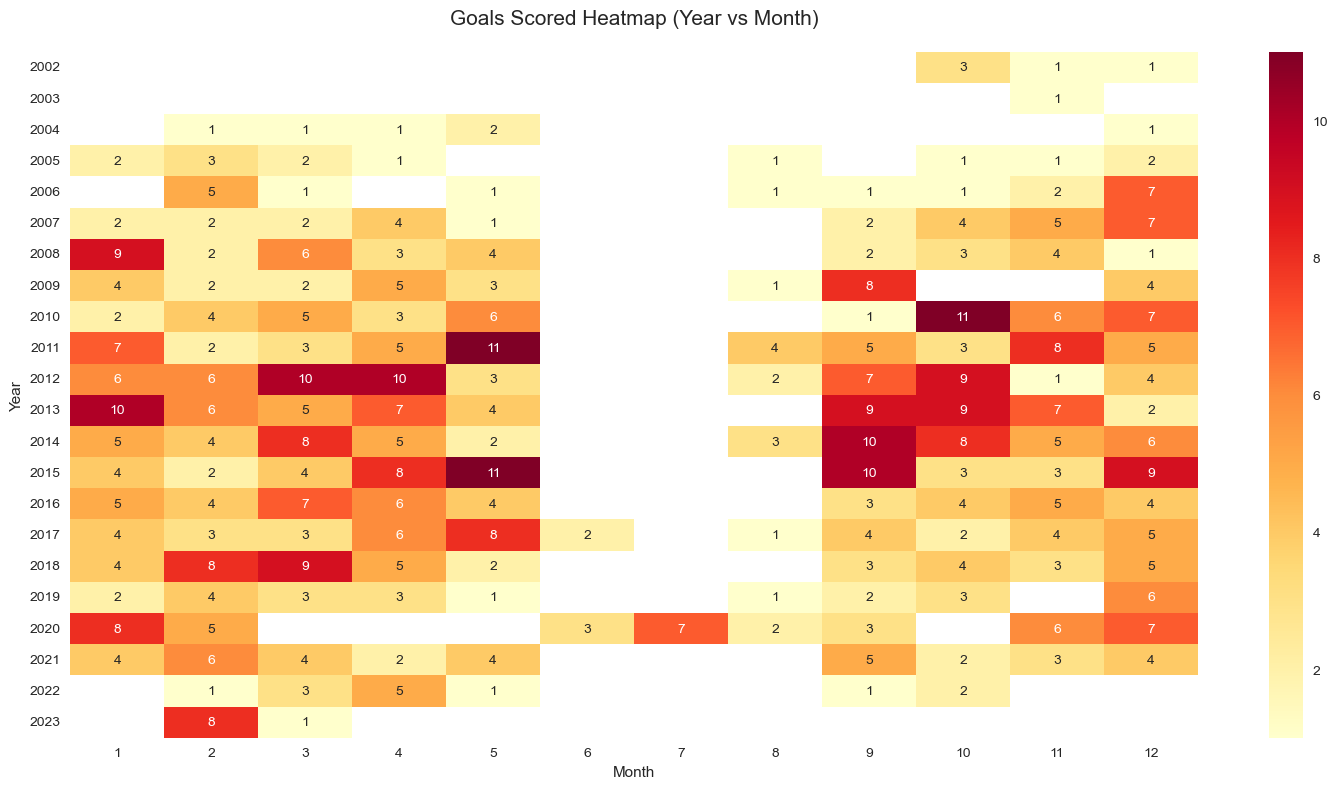

In [16]:
# Create a heatmap of goals by month and year
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
heatmap_data = df.groupby(['year', 'month']).size().unstack()

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Goals Scored Heatmap (Year vs Month)', fontsize=15, pad=20)
plt.ylabel('Year')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


Goals Scored by Club:
             Club  Goals  Percentage
      Real Madrid    450       63.38
Manchester United    145       20.42
      Juventus FC    101       14.23
      Al-Nassr FC      9        1.27
      Sporting CP      5        0.70


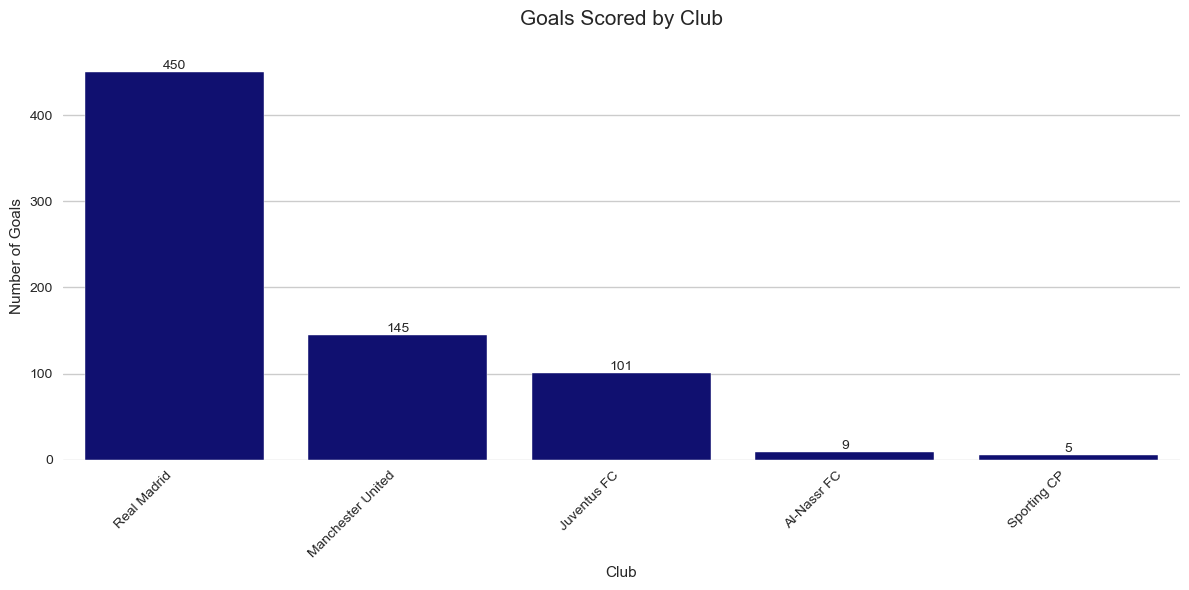

In [17]:
# Count goals per club
goals_per_club = df['Club'].value_counts().reset_index()
goals_per_club.columns = ['Club', 'Goals']

# Calculate percentage of total goals
total_goals = goals_per_club['Goals'].sum()
goals_per_club['Percentage'] = (goals_per_club['Goals'] / total_goals * 100).round(2)

# Display formatted table
print("\nGoals Scored by Club:")
print("=" * 50)
formatted_table = goals_per_club.to_string(index=False)
print(formatted_table)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Club', y='Goals', data=goals_per_club, color='navy')
plt.title('Goals Scored by Club', fontsize=15, pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Club')
plt.ylabel('Number of Goals')

# Add value labels on top of each bar
for i, v in enumerate(goals_per_club['Goals']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [21]:
# Convert minute strings to numeric values
def clean_minute(minute_str):
    if pd.isna(minute_str):
        return np.nan
    # Remove '+' and take first number for extra time minutes
    minute = minute_str.split('+')[0]
    return float(minute)

# Create a minute column
df['clean_minute'] = df['Minute'].apply(clean_minute)

# Separate regular time and extra time goals
regular_time_goals = df[df['clean_minute'] <= 90]
extra_time_goals = df[df['clean_minute'] > 90]

# Create 15-minute intervals
bins = [0, 15, 30, 45, 60, 75, 90]
labels = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90']

goals_by_interval = pd.cut(regular_time_goals['clean_minute'], 
                          bins=bins, 
                          labels=labels, 
                          include_lowest=True).value_counts().sort_index()

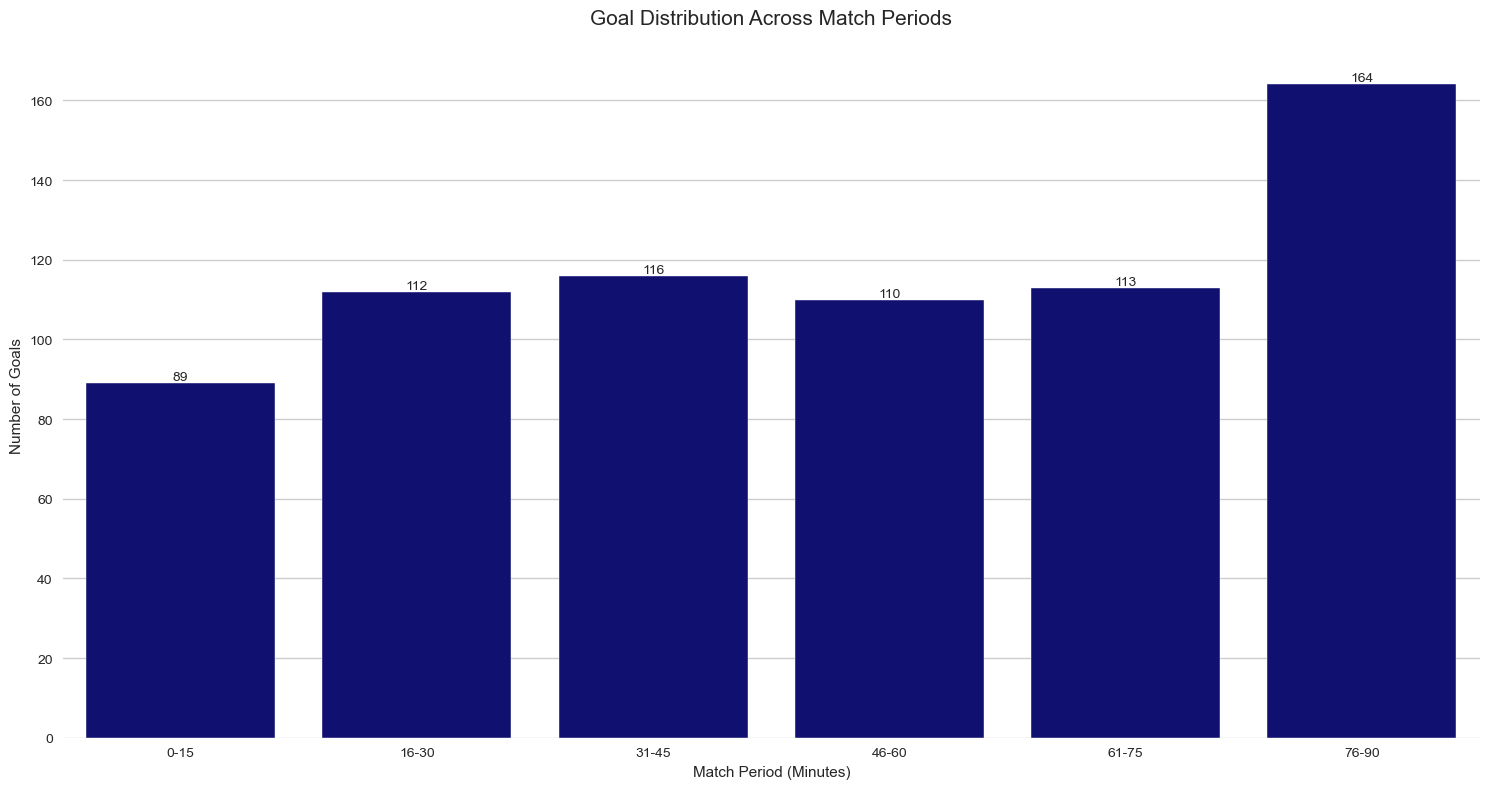


Goal Scoring Pattern Analysis:

Total Goals: 710
Regular Time Goals: 704
Extra Time Goals: 6

Regular Time Statistics:
First Quartile (25%): 27.0 minutes
Median (50%): 51.0 minutes
Third Quartile (75%): 73.0 minutes
IQR: 46.0 minutes

Most Prolific Scoring Periods:
76-90 mins: 164 goals
31-45 mins: 116 goals
61-75 mins: 113 goals

Half-by-Half Analysis:
First Half: 317 goals (45.0%)
Second Half: 387 goals (55.0%)
Extra Time: 6 goals

Extra Time Goals:
Total Extra Time Goals: 6
Minute: 103 - Match: Real Madrid vs FC Barcelona
Minute: 120 - Match: Real Madrid vs Atletico de Madrid
Minute: 97 - Match: Real Madrid vs Kashima Antlers
Minute: 104 - Match: Real Madrid vs Kashima Antlers
Minute: 105 - Match: Real Madrid vs Bayern Munich
Minute: 109 - Match: Real Madrid vs Bayern Munich


In [23]:
# Plotting
plt.figure(figsize=(15, 8))

# Create the main bar plot
ax = sns.barplot(x=goals_by_interval.index, y=goals_by_interval.values, color='navy')

plt.title('Goal Distribution Across Match Periods', fontsize=15, pad=20)
plt.xlabel('Match Period (Minutes)')
plt.ylabel('Number of Goals')

# Add value labels on top of each bar
for i, v in enumerate(goals_by_interval.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print statistical summary
print("\nGoal Scoring Pattern Analysis:")
print("=" * 50)
print(f"\nTotal Goals: {len(df)}")
print(f"Regular Time Goals: {len(regular_time_goals)}")
print(f"Extra Time Goals: {len(extra_time_goals)}")

# Calculate quartiles for regular time goals
q1 = regular_time_goals['clean_minute'].quantile(0.25)
q2 = regular_time_goals['clean_minute'].quantile(0.50)
q3 = regular_time_goals['clean_minute'].quantile(0.75)
iqr = q3 - q1

print("\nRegular Time Statistics:")
print(f"First Quartile (25%): {q1:.1f} minutes")
print(f"Median (50%): {q2:.1f} minutes")
print(f"Third Quartile (75%): {q3:.1f} minutes")
print(f"IQR: {iqr:.1f} minutes")

# Calculate and display peak scoring periods
goals_by_interval_sorted = goals_by_interval.sort_values(ascending=False)
print("\nMost Prolific Scoring Periods:")
top_3_periods = goals_by_interval_sorted.head(3)
for idx, goals in enumerate(top_3_periods):
    period = top_3_periods.index[idx]
    print(f"{period} mins: {goals} goals")

# Calculate percentage of goals in each half
first_half_goals = len(regular_time_goals[regular_time_goals['clean_minute'] <= 45])
second_half_goals = len(regular_time_goals[regular_time_goals['clean_minute'] > 45])
total_regular_time_goals = len(regular_time_goals)

print("\nHalf-by-Half Analysis:")
print(f"First Half: {first_half_goals} goals ({(first_half_goals/total_regular_time_goals*100):.1f}%)")
print(f"Second Half: {second_half_goals} goals ({(second_half_goals/total_regular_time_goals*100):.1f}%)")
print(f"Extra Time: {len(extra_time_goals)} goals")

# Show extra time goals details
if len(extra_time_goals) > 0:
    print("\nExtra Time Goals:")
    print(f"Total Extra Time Goals: {len(extra_time_goals)}")
    for _, goal in extra_time_goals.iterrows():
        print(f"Minute: {goal['Minute']} - Match: {goal['Club']} vs {goal['Opponent']}")